In [154]:
import pandas as pd
import numpy as np
import os
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df = pd.read_csv("scores.csv")

In [156]:
df.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


In [157]:
df.shape #rows and columns

(55, 12)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [159]:
df.isnull().sum()

number        0
days          0
gender        0
age           0
afftype      32
melanch      35
inpatient    32
edu           2
marriage     32
work         32
madrs1       32
madrs2       32
dtype: int64

In [160]:
df.columns

Index(['number', 'days', 'gender', 'age', 'afftype', 'melanch', 'inpatient',
       'edu', 'marriage', 'work', 'madrs1', 'madrs2'],
      dtype='object')

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [162]:
df.describe()

,days,gender,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
count,55.000000,55.000000,23.000000,20.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,12.600000,1.454545,1.739130,1.950000,1.782609,1.521739,1.869565,22.739130,20.000000
std,2.491467,0.502519,0.540824,0.223607,0.421741,0.510754,0.344350,4.797892,4.729021
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,11.000000
25%,13.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,18.500000,16.000000
50%,13.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,24.000000,21.000000
75%,13.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,26.000000,24.500000
max,20.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,29.000000,28.000000


In [163]:
df.drop(['days','madrs2'], axis=1, inplace=True)

In [164]:
df.describe()

,gender,afftype,melanch,inpatient,marriage,work,madrs1
count,55.000000,23.000000,20.000000,23.000000,23.000000,23.000000,23.000000
mean,1.454545,1.739130,1.950000,1.782609,1.521739,1.869565,22.739130
std,0.502519,0.540824,0.223607,0.421741,0.510754,0.344350,4.797892
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000
25%,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,18.500000
50%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,24.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,26.000000
max,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,29.000000


In [165]:
#sliced_df = df.loc['control_1':'control_32']

In [166]:
#df = df.drop(index=df.loc['control_1':'control_32'].index)

In [167]:
#df.tail(5)

In [168]:
df.drop(labels=range(23, 55), axis=0)

,number,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1
0,condition_1,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0
1,condition_2,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0
2,condition_3,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0
3,condition_4,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0
4,condition_5,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0
5,condition_6,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0
6,condition_7,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0
7,condition_8,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0
8,condition_9,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0
9,condition_10,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0


In [169]:
# Change 'gender' from integer to object
df['gender'] = df['gender'].replace({1 : 'Female'})
df['gender'] = df['gender'].replace({2 : 'Male'})

In [170]:
df.head()

,number,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1
0,condition_1,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0
1,condition_2,Male,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0
2,condition_3,Female,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0
3,condition_4,Male,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0
4,condition_5,Male,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0


Text(0.5, 1.0, 'Percent of gender with depression')

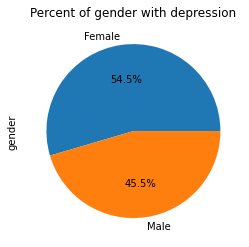

In [171]:
Gender = df['gender']
Gender.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percent of gender with depression')

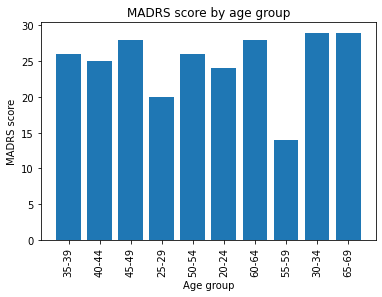

In [172]:
plt.bar('age', 'madrs1', data = df, linewidth = 1)
plt.xlabel('Age group')
plt.xticks(rotation = 90)
plt.ylabel('MADRS score')
plt.title('MADRS score by age group')
plt.show()

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   gender     55 non-null     object 
 2   age        55 non-null     object 
 3   afftype    23 non-null     float64
 4   melanch    20 non-null     float64
 5   inpatient  23 non-null     float64
 6   edu        53 non-null     object 
 7   marriage   23 non-null     float64
 8   work       23 non-null     float64
 9   madrs1     23 non-null     float64
dtypes: float64(6), object(4)
memory usage: 4.4+ KB


In [174]:
# Change 'afftype' from integer to object
df['afftype'] = df['afftype'].replace({1.0 : 'Biopolar II'})
df['afftype'] = df['afftype'].replace({2.0 : 'Unipolar Depressive'})
df['afftype'] = df['afftype'].replace({3.0 : 'Biopolar I'})

Text(0.5, 1.0, 'Percent of afftype with depression')

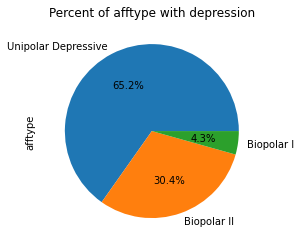

In [175]:
Afftype = df['afftype']
Afftype.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percent of afftype with depression')

In [176]:
# drop NaN from 'melanch' for melancholia graph
M_df = df.drop(labels=range(6, 9), axis=0)
M_df.drop(labels=range(23,55), axis=0)

,number,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1
0,condition_1,Male,35-39,Unipolar Depressive,2.0,2.0,6-10,1.0,2.0,19.0
1,condition_2,Male,40-44,Biopolar II,2.0,2.0,6-10,2.0,2.0,24.0
2,condition_3,Female,45-49,Unipolar Depressive,2.0,2.0,6-10,2.0,2.0,24.0
3,condition_4,Male,25-29,Unipolar Depressive,2.0,2.0,11-15,1.0,1.0,20.0
4,condition_5,Male,50-54,Unipolar Depressive,2.0,2.0,11-15,2.0,2.0,26.0
5,condition_6,Female,35-39,Unipolar Depressive,2.0,2.0,6-10,1.0,2.0,18.0
9,condition_10,Male,45-49,Unipolar Depressive,2.0,2.0,6-10,1.0,2.0,28.0
10,condition_11,Female,45-49,Unipolar Depressive,2.0,2.0,6-10,1.0,2.0,24.0
11,condition_12,Male,40-44,Biopolar II,2.0,2.0,6-10,2.0,2.0,25.0
12,condition_13,Male,35-39,Biopolar II,2.0,2.0,11-15,2.0,2.0,18.0


In [177]:
# Change 'melanch' from integer to object
M_df['melanch'] = M_df['melanch'].replace({1.0 : 'Melancholia'})
M_df['melanch'] = M_df['melanch'].replace({2.0 : 'No melancholia'})

Text(0.5, 1.0, 'Percent of melancholia with depression')

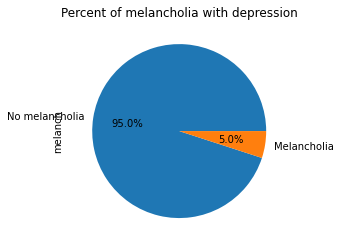

In [178]:
Melanch = M_df['melanch']
Melanch.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percent of melancholia with depression')

In [183]:
# drop NaN from 'edu' for education graph
E_df = df.drop(labels=range(21, 22), axis=0)
E_df.drop(labels=range(23,55), axis=0)

,number,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1
0,condition_1,Male,35-39,Unipolar Depressive,2.0,2.0,6-10,1.0,2.0,19.0
1,condition_2,Male,40-44,Biopolar II,2.0,2.0,6-10,2.0,2.0,24.0
2,condition_3,Female,45-49,Unipolar Depressive,2.0,2.0,6-10,2.0,2.0,24.0
3,condition_4,Male,25-29,Unipolar Depressive,2.0,2.0,11-15,1.0,1.0,20.0
4,condition_5,Male,50-54,Unipolar Depressive,2.0,2.0,11-15,2.0,2.0,26.0
5,condition_6,Female,35-39,Unipolar Depressive,2.0,2.0,6-10,1.0,2.0,18.0
6,condition_7,Female,20-24,Biopolar II,NaN,2.0,11-15,2.0,1.0,24.0
7,condition_8,Male,25-29,Unipolar Depressive,NaN,2.0,11-15,1.0,2.0,20.0
8,condition_9,Male,45-49,Biopolar II,NaN,2.0,6-10,1.0,2.0,26.0
9,condition_10,Male,45-49,Unipolar Depressive,2.0,2.0,6-10,1.0,2.0,28.0


In [184]:
#checking which column is integer or object
E_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 54
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     54 non-null     object 
 1   gender     54 non-null     object 
 2   age        54 non-null     object 
 3   afftype    22 non-null     object 
 4   melanch    19 non-null     float64
 5   inpatient  22 non-null     float64
 6   edu        52 non-null     object 
 7   marriage   22 non-null     float64
 8   work       22 non-null     float64
 9   madrs1     22 non-null     float64
dtypes: float64(5), object(5)
memory usage: 6.7+ KB


Text(0.5, 1.0, 'Percent of education grouped in years with depression')

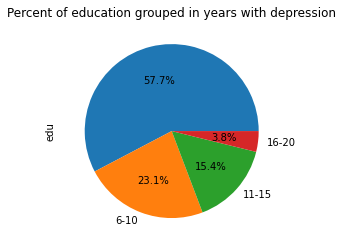

In [187]:
Edu = E_df['edu']
Edu.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percent of education grouped in years with depression')
# what's 57.7%???

In [189]:
# Change 'marriage' from integer to object
df['marriage'] = df['marriage'].replace({1.0 : 'Married or cohabiting'})
df['marriage'] = df['marriage'].replace({2.0 : 'Single'})

Text(0.5, 1.0, 'Percent of marriagement rate with depression')

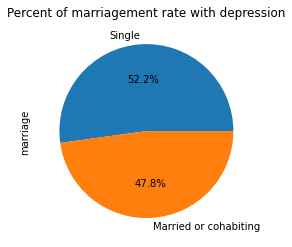

In [190]:
Marriage = df['marriage']
Marriage.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percent of marriagement rate with depression')

In [191]:
# Change 'work' from integer to object
df['work'] = df['work'].replace({1.0 : 'Working'})
df['work'] = df['work'].replace({2.0 : 'Not working'})

Text(0.5, 1.0, 'Percent of working rate with depression')

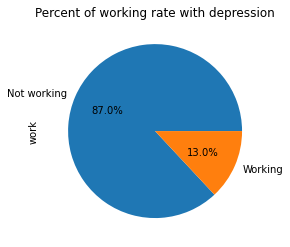

In [192]:
Work = df['work']
Work.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percent of working rate with depression')